In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import randint

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline

from random import randint

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from explainerdashboard import ClassifierExplainer, ExplainerDashboard


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


In [2]:
# Train Data set
Raw_data = pd.read_csv(r'E:\External Projects\XAI\Second Paper\Code\Loan-Approval-Prediction-master\Dataset.csv')
Features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

Raw_data = Raw_data.drop(['Loan_ID'], axis=1)

In [15]:
Raw_data.isna().sum(axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
Raw_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
X_data = Raw_data.drop(['Loan_Status'], axis=1)
y_data = Raw_data['Loan_Status']

In [4]:
# Data Imputation

numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_features = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Credit_History']

# Categorical features
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X_data[categorical_features])
SimpleImputer()
X_cat = pd.DataFrame(imp_mean.transform(X_data[categorical_features]), columns=categorical_features)

# Numerical features
imputer = KNNImputer(n_neighbors=2)
X_num = pd.DataFrame(imputer.fit_transform(X_data[numeric_features]), columns=numeric_features)

# X_num.loc[X_num.Credit_History == 0.5] = 0

In [5]:
X_coded = X_cat.apply(preprocessing.LabelEncoder().fit_transform)
X_data = X_num.join(X_coded)

for cat in categorical_features:
    one_hot = pd.get_dummies(X_data[cat], prefix=cat)
    X_data[one_hot.columns] = one_hot
X_data = X_data.drop(categorical_features, axis=1)

In [6]:
# Property Area by Label Encoder
Label = preprocessing.LabelEncoder().fit(y_data)
y = Label.transform(y_data)

In [21]:
# sns.set_theme(style="darkgrid")
# df_target_pc = y.value_counts() / len(y) * 100
# target_names = ["Rejected", "Approved"] + ['Missing Value']
# target_pc = [df_target_pc[0], df_target_pc[1], 100 - (df_target_pc[0] + df_target_pc[1])]
# f, ax = plt.subplots(figsize=(10, 7.5))
# sns.barplot(x=target_names, y=target_pc, ax=ax)
# ax.set_ylabel('% of Patches')
# ax.set_ylim([0, 110])
# print(y.value_counts())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.3, shuffle=True, random_state=42)

In [8]:
# Normalization
minmax_scale = MinMaxScaler().fit(X_train, X_test)
X_train_norm = pd.DataFrame(minmax_scale.transform(X_train), columns=X_data.columns, index=X_train.index)
X_test_norm = pd.DataFrame(minmax_scale.transform(X_test), columns=X_data.columns, index=X_test.index)

In [24]:
# X_data.to_csv('E:/External Projects/XAI/Code/Game/MOPSO/Clean_Dataset.csv', index = True)

Logistic regression

Cross validation score: [0.8255814  0.75581395 0.69767442 0.6627907  0.68235294]
Mean test score: [0.72248974 0.72248974 0.72248974 0.72248974 0.72248974 0.72248974
 0.72248974 0.72248974 0.72248974 0.72248974 0.72248974 0.72248974
 0.72248974 0.72248974 0.72248974 0.72248974 0.72248974 0.72248974
 0.7201368  0.72246238 0.7201368  0.7201368  0.72246238 0.7201368
 0.7201368  0.72246238 0.7201368  0.7201368  0.72246238 0.7201368
 0.7201368  0.72246238 0.7201368  0.7201368  0.72246238 0.7201368
 0.7201368  0.7201368  0.7201368  0.7201368  0.7201368  0.7201368
 0.7201368  0.7201368  0.7201368  0.7201368  0.7201368  0.7201368
 0.7201368  0.7201368  0.7201368  0.7201368  0.7201368  0.7201368 ], 
Mean train score: [0.75640213 0.75698522 0.75640213 0.75640213 0.75698522 0.75640213
 0.75640213 0.75698522 0.75640213 0.75640213 0.75698522 0.75640213
 0.75640213 0.75698522 0.75640213 0.75640213 0.75698522 0.75640213
 0.75640382 0.75640382 0.75640382 0.75640382 0.75640382 0.75640382
 0.75640382 0.7

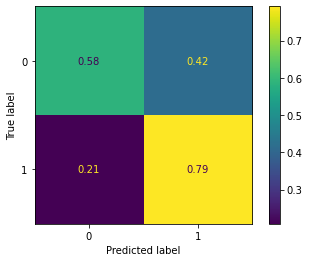

In [25]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(max_iter=1000, random_state=42))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train_norm, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
          'solver': ['lbfgs', 'liblinear', 'saga'],
          'C': [3, 5, 7],
          'max_iter': [1000, 2000, 3000],
          'class_weight': ['balanced', None],
          'random_state': [42]
}

new_params = {'logisticregression__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

LR = grid_imba.fit(X_train_norm, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
LR_prediction = LR.predict(X_test_norm)

# Measures
LR_accuracy = round(accuracy_score(y_test, LR_prediction), 4)
LR_precision = round(precision_score(y_test, LR_prediction), 4)
LR_recall = round(recall_score(y_test, LR_prediction), 4)
LR_f1 = round(f1_score(y_test, LR_prediction), 4)

print(f"Logistic regression Accuracy: {LR_accuracy}")
print(f"Logistic regression Precision: {LR_precision}")
print(f"Logistic regression Recall: {LR_recall}")
print(f"Logistic regression F1: {LR_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, LR_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Decision tree

Cross validation score: [0.74418605 0.72093023 0.73255814 0.68604651 0.74117647]
Mean test score: [0.77160055 0.76930233 0.77162791 0.77860465 0.77160055 0.76930233
 0.77162791 0.77860465 0.77160055 0.76930233 0.77162791 0.77860465
 0.77160055 0.76930233 0.77162791 0.77860465 0.77160055 0.76930233
 0.77162791 0.77860465 0.77160055 0.76930233 0.77162791 0.77860465
 0.77160055 0.76930233 0.77162791 0.77860465 0.77160055 0.76930233
 0.77162791 0.77860465 0.77160055 0.76930233 0.77162791 0.77860465
 0.77160055 0.76930233 0.77162791 0.77860465 0.77160055 0.76930233
 0.77162791 0.77860465 0.77160055 0.76930233 0.77162791 0.77860465
 0.71099863 0.7226539  0.72725034 0.74837209 0.70867305 0.72963064
 0.72725034 0.74837209 0.70867305 0.72963064 0.72725034 0.74837209
 0.70867305 0.72963064 0.72725034 0.74837209 0.71099863 0.7226539
 0.72725034 0.74837209 0.70867305 0.72963064 0.72725034 0.74837209
 0.70867305 0.72963064 0.72725034 0.74837209 0.70867305 0.72963064
 0.72725034 0.74837209 0.7109986

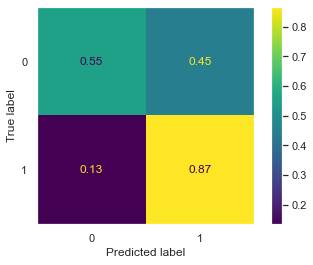

In [106]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), DecisionTreeClassifier(random_state=42))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train, y_train, scoring='accuracy', cv=kf)}")

# Grid search
DT_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 10, 12],
    'min_samples_leaf': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    "max_leaf_nodes":[20, 40, 60, 80],
    'random_state': [42]
}

new_params = {'decisiontreeclassifier__' + key: DT_params[key] for key in DT_params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

DT = grid_imba.fit(X_train, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
DT_prediction = DT.predict(X_test)

# Measures
DT_accuracy = round(accuracy_score(y_test, DT_prediction), 4)
DT_precision = round(precision_score(y_test, DT_prediction), 4)
DT_recall = round(recall_score(y_test, DT_prediction), 4)
DT_f1 = round(f1_score(y_test, DT_prediction), 4)

print(f"Decision Tree Accuracy: {DT_accuracy}")
print(f"Decision Tree Precision: {DT_precision}")
print(f"Decision Tree Recall: {DT_recall}")
print(f"Decision Tree F1: {DT_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, DT_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Support vector machine

Cross validation score: [0.84883721 0.80232558 0.81395349 0.62790698 0.83529412]
Mean test score: [0.7295212  0.7295212  0.7295212  0.71335157 0.71335157 0.71335157
 0.7274145  0.7274145  0.7274145  0.7295212  0.7295212  0.7295212
 0.77162791 0.77162791 0.77162791 0.78566347 0.78566347 0.78566347
 0.7295212  0.7295212  0.7295212  0.73206566 0.73206566 0.73206566
 0.7274145  0.7274145  0.7274145  0.7295212  0.7295212  0.7295212
 0.68990424 0.68990424 0.68990424 0.78566347 0.78566347 0.78566347
 0.7295212  0.7295212  0.7295212  0.74826265 0.74826265 0.74826265
 0.7274145  0.7274145  0.7274145  0.7295212  0.7295212  0.7295212
 0.62932969 0.62932969 0.62932969 0.78566347 0.78566347 0.78566347], 
Mean train score: [0.75641908 0.75641908 0.75641908 0.81061089 0.81061089 0.81061089
 0.66839616 0.66839616 0.66839616 0.75641908 0.75641908 0.75641908
 0.78146315 0.78146315 0.78146315 0.80243915 0.80243915 0.80243915
 0.75641908 0.75641908 0.75641908 0.86247373 0.86247373 0.86247373
 0.66839616 0

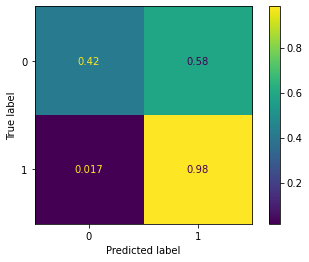

In [27]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), SVC(gamma='auto', probability=True))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train_norm, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
          'kernel':('linear', 'poly', 'sigmoid'), 
          'degree':[3, 5, 7], 
          'gamma':('scale', 'auto'), 
          'max_iter':[20000, 30000, 40000],
          'random_state': [42]
}

new_params = {'svc__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

SVC = grid_imba.fit(X_train_norm, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
SVC_prediction = SVC.predict(X_test_norm)

# Measures
SVC_accuracy = round(accuracy_score(y_test, SVC_prediction), 4)
SVC_precision = round(precision_score(y_test, SVC_prediction), 4)
SVC_recall = round(recall_score(y_test, SVC_prediction), 4)
SVC_f1 = round(f1_score(y_test, SVC_prediction), 4)

print(f"SVC Accuracy: {SVC_accuracy}")
print(f"SVC Precision: {SVC_precision}")
print(f"SVC Recall: {SVC_recall}")
print(f"SVC F1: {SVC_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, SVC_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

MLP

Cross validation score: [0.77906977 0.6744186  0.75581395 0.61627907 0.72941176]
Mean test score: [0.70859097 0.74352941 0.70391245 0.70859097 0.74352941 0.70391245
 0.70859097 0.74352941 0.70391245 0.70859097 0.74120383 0.70391245
 0.70859097 0.74120383 0.70391245 0.70859097 0.74120383 0.70391245
 0.69222982 0.72725034 0.68763338 0.69222982 0.72725034 0.68763338
 0.69222982 0.72725034 0.68763338 0.69222982 0.72492476 0.68763338
 0.69222982 0.72492476 0.68763338 0.69222982 0.72492476 0.68763338
 0.72259918 0.74352941 0.71099863 0.72259918 0.74352941 0.71099863
 0.72259918 0.74352941 0.71099863 0.72259918 0.74120383 0.71099863
 0.72259918 0.74120383 0.71099863 0.72259918 0.74120383 0.71099863
 0.72960328 0.72725034 0.71326949 0.72960328 0.72725034 0.71326949
 0.72960328 0.72725034 0.71326949 0.72960328 0.72492476 0.71326949
 0.72960328 0.72492476 0.71326949 0.72960328 0.72492476 0.71326949], 
Mean train score: [0.89802359 0.75291715 0.77505255 0.89802359 0.75291715 0.77505255
 0.8980235

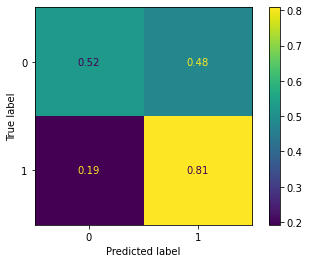

In [28]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), MLPClassifier(max_iter=8000, random_state=42))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train_norm, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
          'solver':('lbfgs', 'sgd', 'adam'), 
          'max_iter':[8000, 8500, 9000], 
          'learning_rate':['constant', 'adaptive'], 
          'alpha':[0.0001, 0.05], 
          'hidden_layer_sizes':[(10,), (20,)]
}

new_params = {'mlpclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

MLP = grid_imba.fit(X_train_norm, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
MLP_prediction = MLP.predict(X_test_norm)

# Measures
MLP_accuracy = round(accuracy_score(y_test, MLP_prediction), 4)
MLP_precision = round(precision_score(y_test, MLP_prediction), 4)
MLP_recall = round(recall_score(y_test, MLP_prediction), 4)
MLP_f1 = round(f1_score(y_test, MLP_prediction), 4)

print(f"MLP Accuracy: {MLP_accuracy}")
print(f"MLP Precision: {MLP_precision}")
print(f"MLP Recall: {MLP_recall}")
print(f"MLP F1: {MLP_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, MLP_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Random forest

Cross validation score: [0.8255814  0.80232558 0.81395349 0.72093023 0.81176471]
Mean test score: [0.80662107 0.81127223 0.81592339 0.80894665 0.81127223 0.81592339
 0.80662107 0.81127223 0.81592339 0.81127223 0.80894665 0.81359781
 0.80894665 0.81359781 0.81592339 0.80894665 0.81359781 0.81592339
 0.80662107 0.81127223 0.81592339 0.80894665 0.81127223 0.81359781
 0.80894665 0.81359781 0.81592339 0.80894665 0.81359781 0.81592339
 0.80894665 0.81359781 0.81592339 0.80894665 0.80894665 0.81592339
 0.80894665 0.81127223 0.81592339 0.80894665 0.81127223 0.81592339
 0.80894665 0.81127223 0.81592339 0.80894665 0.81127223 0.81592339
 0.81592339 0.81359781 0.81586867 0.81124487 0.82057456 0.81589603
 0.82057456 0.82057456 0.81357045 0.80891929 0.81359781 0.81824897
 0.81592339 0.81589603 0.81121751 0.81592339 0.81589603 0.81121751
 0.81824897 0.81589603 0.81121751 0.81824897 0.81124487 0.81592339
 0.81824897 0.81357045 0.81121751 0.81824897 0.81357045 0.81121751
 0.81824897 0.81357045 0.811217

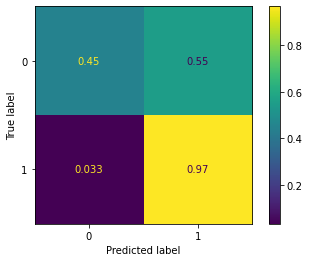

In [29]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=100, random_state=42))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [42]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

RF = grid_imba.fit(X_train, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
RF_prediction = RF.predict(X_test)

# Measures
RF_accuracy = round(accuracy_score(y_test, RF_prediction), 4)
RF_precision = round(precision_score(y_test, RF_prediction), 4)
RF_recall = round(recall_score(y_test, RF_prediction), 4)
RF_f1 = round(f1_score(y_test, RF_prediction), 4)

print(f"Random forest Accuracy: {RF_accuracy}")
print(f"Random forest Precision: {RF_precision}")
print(f"Random forest Recall: {RF_recall}")
print(f"Random forest F1: {RF_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, RF_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

XGBoost

Cross validation score: [0.79069767 0.70930233 0.74418605 0.70930233 0.76470588]
Mean test score: [0.73428181 0.73890561 0.75532148 0.79023256 0.77389877 0.77863201
 0.79491108 0.79729138 0.78569083 0.75291382 0.7506156  0.75534884
 0.78093023 0.76459644 0.77857729 0.7925855  0.78566347 0.78566347
 0.76002736 0.74829001 0.75997264 0.78320109 0.77154583 0.79731874
 0.7925855  0.79031464 0.78566347 0.76229822 0.74823529 0.78101231
 0.78325581 0.76683995 0.78098495 0.77852257 0.7949658  0.79964432
 0.74837209 0.7622435  0.77630643 0.78093023 0.76930233 0.79261286
 0.77619699 0.79493844 0.79499316 0.73896033 0.76232558 0.76932969
 0.76930233 0.77392613 0.79731874 0.77619699 0.79261286 0.80662107
 0.75989056 0.77633379 0.78569083 0.77865937 0.77860465 0.79264022
 0.78785226 0.7949658  0.78798906 0.75294118 0.76927497 0.77168263
 0.77633379 0.78566347 0.79729138 0.77157319 0.79726402 0.80664843
 0.7693844  0.75526676 0.77633379 0.78087551 0.78093023 0.80426813
 0.77157319 0.79726402 0.799671

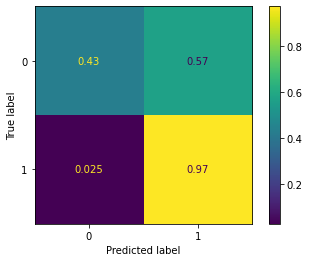

In [9]:
# Cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=42), XGBClassifier(eval_metric='mlogloss', use_label_encoder=False))
print(f"Cross validation score: {cross_val_score(imba_pipeline, X_train, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

XGBoost = grid_imba.fit(X_train, y_train)

print(f"Mean test score: {grid_imba.cv_results_['mean_test_score']}, \nMean train score: {grid_imba.cv_results_['mean_train_score']}")
print(f"Grid search best score: {round(grid_imba.best_score_, 4)}")
print(f"Grid search best parameters: {grid_imba.best_params_}")

# Test score
XGBoost_prediction = XGBoost.predict(X_test)

# Measures
XGBoost_accuracy = round(accuracy_score(y_test, XGBoost_prediction), 4)
XGBoost_precision = round(precision_score(y_test, XGBoost_prediction), 4)
XGBoost_recall = round(recall_score(y_test, XGBoost_prediction), 4)
XGBoost_f1 = round(f1_score(y_test, XGBoost_prediction), 4)

print(f"XGBoost Accuracy: {XGBoost_accuracy}")
print(f"XGBoost Precision: {XGBoost_precision}")
print(f"XGBoost Recall: {XGBoost_recall}")
print(f"XGBoost F1: {XGBoost_f1}")

# Confusion matrix
cm = confusion_matrix(y_test, XGBoost_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [161]:
X_test_74 = pd.DataFrame(X_test.iloc[74]).T
X_test_74 = X_test_74.replace({'Credit_History_0': 1, 'Credit_History_1': 0}, {'Credit_History_0': 0, 'Credit_History_1': 1})
optimal_74 = X_test_74.replace([300, 3167, 180], [318.83,	3564.53,	168.75])
Modified_74 = np.array(optimal_74).reshape((1,-1))

XGBoost.predict(Modified_74)

array([1])

In [107]:
X_test_426 = X_test.iloc[142, :]
optimal_426 = X_test_426.replace([4606, 81], [4916.67, 150.15])
Modified_426 = np.array(optimal_426).reshape((1,-1))

XGBoost.predict(Modified_426)

array([1])

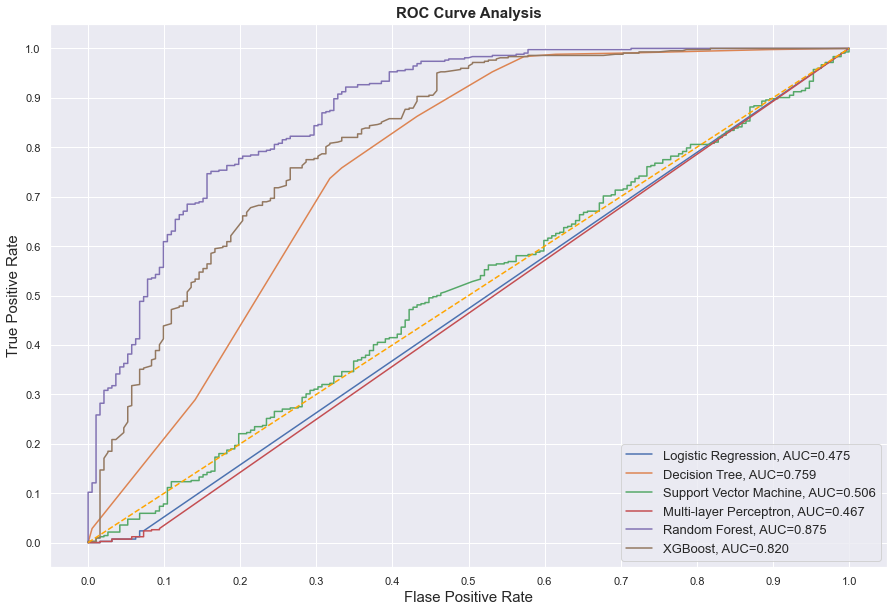

In [31]:
# Instantiate the classfiers and make a list

models_auc = []
models_probs = []
classifiers = [LR, DT, SVC, MLP, RF, XGBoost]
model_name = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Multi-layer Perceptron', 'Random Forest', 'XGBoost']

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for model in classifiers:
    yproba = model.predict_proba(X_data)[::,1]
    models_probs.append(yproba)
    fpr, tpr, threshold = roc_curve(y,  yproba)
    auc = roc_auc_score(y, yproba)
    models_auc.append(auc)
    
    result_table = result_table.append({'classifiers':model_name[classifiers.index(model)],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
models_auc = pd.DataFrame(models_auc, index=model_name)
models_probs = pd.DataFrame(models_probs, index=model_name).T
result_table.set_index('classifiers', inplace=True)

# Plot
fig = plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [104]:
F_index = []

index_df = np.stack((np.array(X_test.index), y_test, XGBoost_prediction), axis=1)

for z in range(len(index_df)):
    if index_df[z, 1] == 0 and index_df[z, 2] == 0:
        F_index.append(index_df[z, 0])

X = np.array(X_test)
rand_num = randint(0, len(F_index))
i = F_index[rand_num-1]

if (index_df[rand_num, 1] == 1) or (index_df[rand_num, 1] != index_df[rand_num, 2]):
    rand_num = randint(0, len(F_index))
    i = F_index[rand_num-1]
    print('The index of the selected rejected customer:', i)
else:
    print('The index of the selected rejected customer:', i)

# Comparison with Benchmark data 
index = []

for j in range(len(X)):
    if index_df[j, 1] == 1 and index_df[j, 2] == 1:
        index.append(index_df[j, 0])

benchmark = np.array(X_test.loc[index])

# Calculating euclidean distance between benchmark data and test data
distance = {}
for zz in range(len(benchmark)):
    distance[zz] = np.linalg.norm(X[rand_num] - benchmark[zz])

# The minimum euclidean distance
min_distance = min(distance, key=distance.get)
label = index[min_distance]

print('The index of the peer approved customer:', label)

The index of the selected rejected customer: 426
The index of the peer approved customer: 361


In [105]:
explainer = ClassifierExplainer(XGBoost, X_test, y_test, cats=categorical_features, labels=['Reject', 'Approve'])
ExplainerDashboard(explainer).run()

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/185 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC(

Calculating prediction probabilities...
Calculating metrics...


Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.105:8050
Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.105:8050/ (Press CTRL+C to quit)
192.168.0.105 - - [13/Feb/2023 08:28:06] "GET / HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:06] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "GET /_dash-layout HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.105 - - [13/Feb/2023 08:28:07] "POST /_dash-update-component HTTP/1.1" 200 -
1